In [1]:
# 훈련세트 테스트세트 편하게 불러오기

In [3]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [8]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [9]:
# 0, 1 이진법 대신 str 이름 자체로 다뤄볼 것

In [10]:
fish_target = df.loc[cond, ['Species']]

In [12]:
fish_target

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
5,Bream
6,Bream
7,Bream
8,Bream
9,Bream


In [14]:
# sklearn 도구 중 train_test_split() 함수 활용할 것
# 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눠줌

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

In [18]:
len(train_target)

36

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [20]:
#kn.fit(train_input, train_target) -> 오류 이유: 데이터프레임 형태이기 때문
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [21]:
kn.score(test_input, test_target['Species'])

1.0

In [23]:
kn.predict([[25, 150]])

C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [24]:
# 그래프

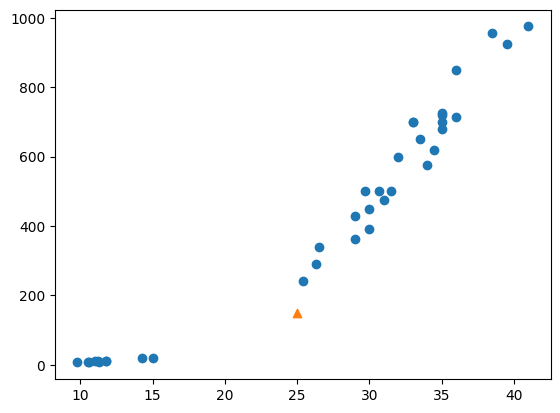

In [27]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [28]:
kn.kneighbors([[25, 150]])

C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 140.00603558,
         140.62090883]]),
 array([[31,  4, 19, 22, 21]]))

In [30]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     26.872222
Weight     435.497222
dtype: float64
Length2     10.127039
Weight     316.381107
dtype: float64


In [33]:
# 원본 데이터에서 평균 빼기 / std = 표준점수
train_scaled = (train_input - mean) / std
# 스케일이 일정하게 바뀐 데이터
# 이제 같은 유형의 데이터가 만들어짐

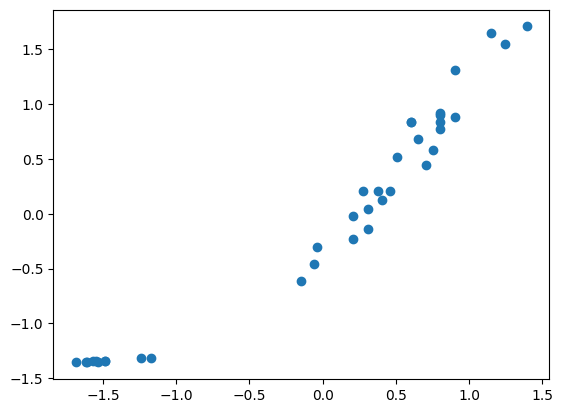

In [34]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [35]:
# 스케일 비율이 같아짐
# 이제 데이터 분석 가능 -> 이 데이터 바탕으로 학습

In [36]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [37]:
test_scaled = (test_input - mean) / std

In [38]:
kn.score(test_scaled, test_target)

1.0

In [40]:
# kn.predict([[25, 150]]) 이것도 표준점수화 시켜줘야 함

In [41]:
new = ([25, 150] - mean) / std
new

Length2   -0.184874
Weight    -0.902384
dtype: float64

In [42]:
kn.predict([new])

C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

3/4

In [1]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [3]:
# df = df.dropna()
df.dropna(inplace=True)

In [4]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [7]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond]
pg_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
pg_data

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0
...,...,...
338,13.7,4925.0
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [9]:
pg_target = df.loc[cond, ['species']]

In [10]:
pg_target

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


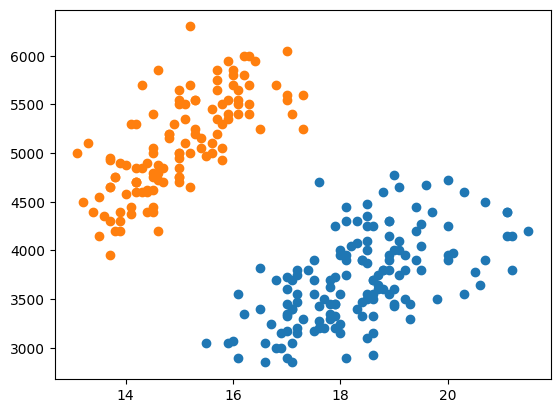

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df.loc[df['species'] == 'Adelie', 'bill_depth_mm'], df.loc[df['species'] == 'Adelie', 'body_mass_g'])
plt.scatter(df.loc[df['species'] == 'Gentoo', 'bill_depth_mm'], df.loc[df['species'] == 'Gentoo', 'body_mass_g'])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target)

In [17]:
# 단위 표준점수화

mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [20]:
kn.fit(train_scaled, train_target)

C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
test_scaled = (test_input - mean) / std

In [22]:
kn.score(test_scaled, test_target)

1.0